Objectives

Classification-Supervised Learning

Train Test Split

Logistic regression classifier

K nearest neighbor 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Binary Classification 


#### Binary or binomial classification is the method of classifying the elements of a given set into two groups (predicting which group
##### each one belongs to) relying on some classification rules in statistics. Some typical binary classification include:

    To classify incoming mail into spam or not spam cathegory
    Grouping Restaurants or Movie rating into one of Positive or Negative ratings
    Medical testing to determine if a patient has certain disease or not etc.....
    
  
### Below shown, How one classifier works for grouping customer reviews into one of positive and negative ratings

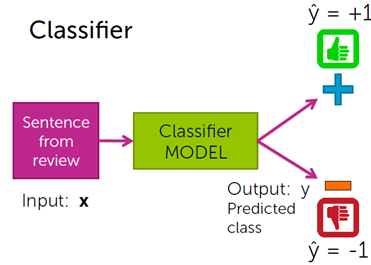

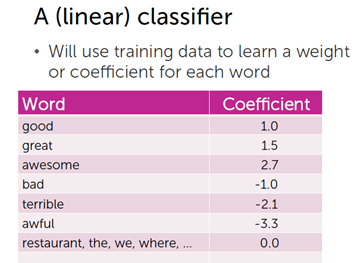

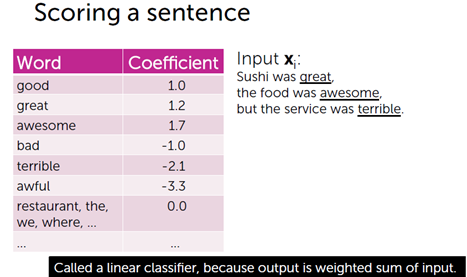

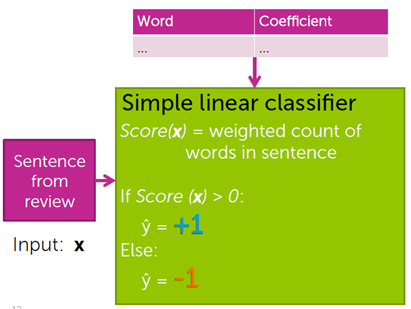

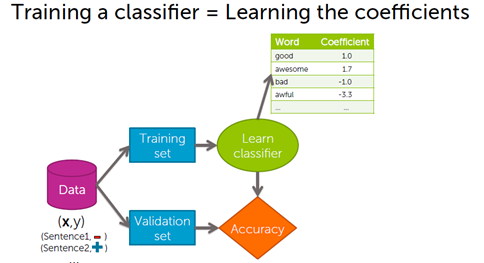

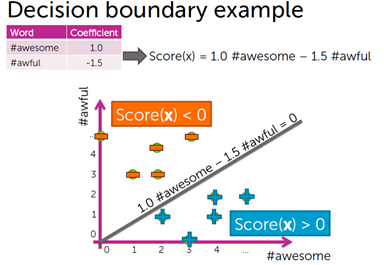

### Data Set of Heart Disease, Feature explanation
Collection of male-female patients with different diagnosis metrics i.e. age, sex, Cholestrol,pressure, balance etc..

Target Variable is either 0 or 1.
If one has heart disease classified as 1, if no then falls to other cathegory

In [2]:
df=pd.read_csv(r'C:\Users\kduisheev\Downloads\heart-disease-uci\heart.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().any() #check for missing values

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
import matplotlib.pyplot as plt

In [6]:
df['target'].value_counts() #people with heart problem are 165

1    165
0    138
Name: target, dtype: int64

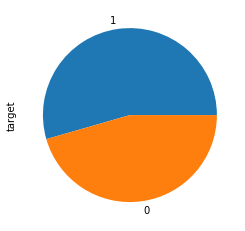

In [7]:
df['target'].value_counts().plot(kind='pie')

### Analysis 
### Select only people having Heart problem, then group them by their sex, meanwhile calculating mean ,max and min of their ages 

In [8]:
df1=df[df['target']==1]
df2 = df1.groupby('sex')['age'].agg(['size','mean','min','max'])
df2

,size,mean,min,max
sex,,,,
0,72,54.555556,34,76
1,93,50.903226,29,70


### Above table shows us, More Male are subject to Heart problem than Female, 
### Average age of Male having desease is also quite younger than Female

In [9]:
# Putting table into indexed order 
df2['gender']=df2.index  # where 0=Female 1= Male
df2.reset_index(inplace=True)
del df2['sex']
df2

,size,mean,min,max,gender
0,72,54.555556,34,76,0
1,93,50.903226,29,70,1


### Barplot of Male Female with separated Min, MAx, and Mean of their ages having Heart disease

<Figure size 576x576 with 0 Axes>

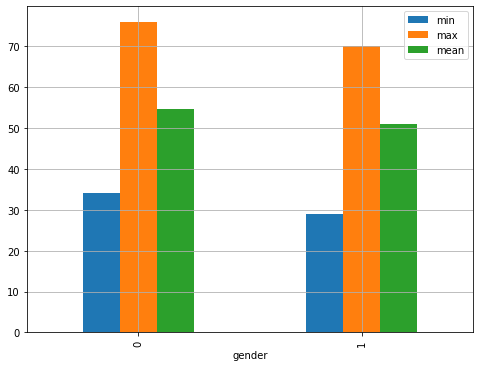

In [10]:
plt.figure(figsize=(8,8))

df2.plot('gender', ['min','max','mean'], kind="bar",figsize=(8,6))
plt.grid()
plt.show()

### Predicting next patient!!!
#####  Since the target variables are classification problem, no longer we will use continuous regression algorithms,so we will pick classification algorithms such as : Logistic REgression, KNN

#### train test split
We need to have two datasets — the training dataset and test dataset, because they are used for different purposes.

The training dataset (also called training set, learning set, or AI training data) is the initial dataset used to train an algorithm to understand how to apply technologies such as neural networks, to learn and produce complex results. It includes both input data and the corresponding expected output. The purpose of the training dataset is to provide your algorithm with “ground truth” data.

The test dataset, however, is used to assess how well your algorithm was trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because the algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm.

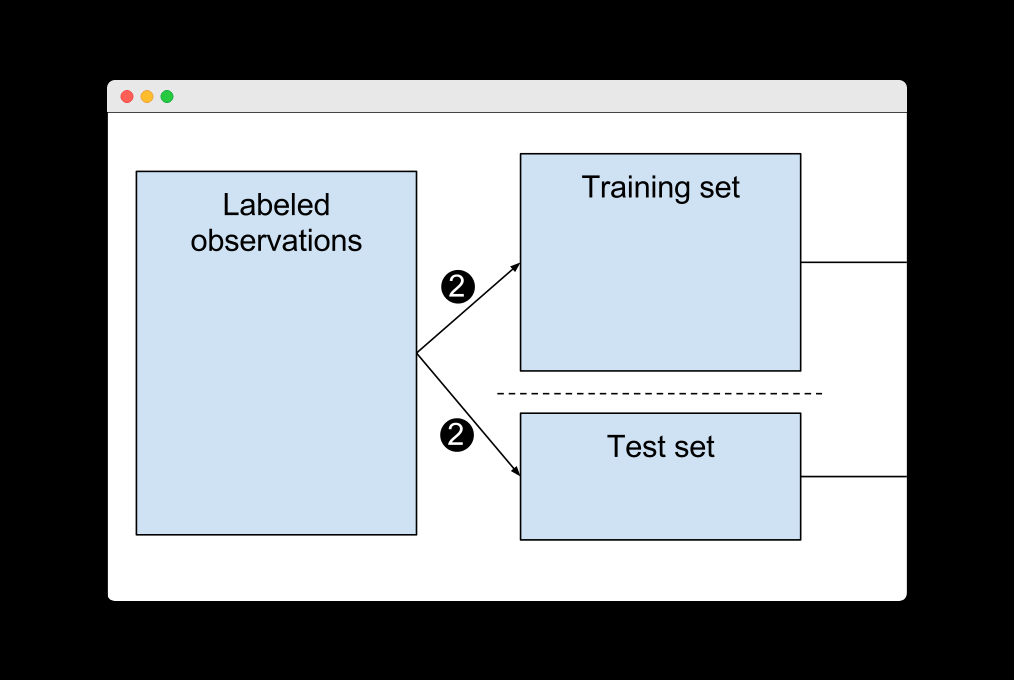

In [11]:
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

trainx,testx,trainy,testy=train_test_split(x,y,random_state=0,test_size=0.2)

lr = LogisticRegression().fit(trainx, trainy)  #Apply built in Ridge Regression
lr_predicted = lr.predict(testx)

print('Accuracy: {:.2f}'.format(accuracy_score(testy, lr_predicted)))


Accuracy: 0.85


C:\Users\kduisheev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
testx.shape

(61, 13)

In [16]:
lr_predicted = lr.predict(trainx)
print('Accuracy: {:.2f}'.format(accuracy_score(trainy, lr_predicted)))

Accuracy: 0.85


## KNN

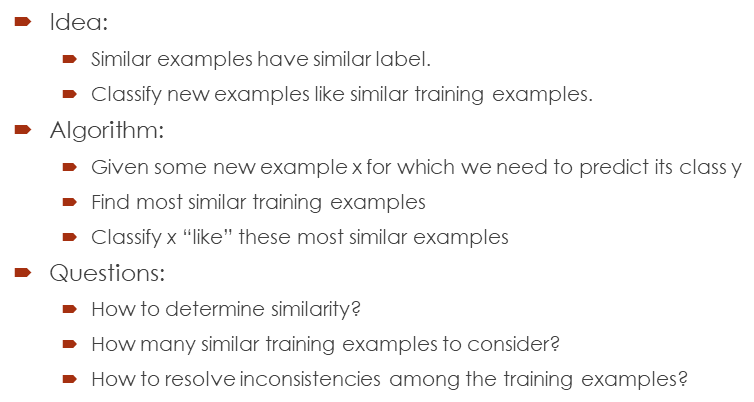

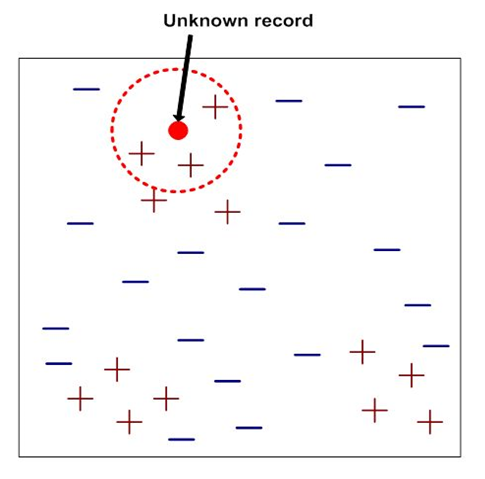

So k-NN takes, K number of nearest points to measure distance from unknown point. Then according to the calculated results k-NN decides to which unknown labels belongs to from majority votes

If k=1
Algorithm takes only one nearest neighbor to measure distance, the closest point with shortest distance defines output
If k=7
From all 7 closest points, algorithm decides unknown label from majority votes, i.e if 4 of are plus, 3 of them are minus, then unknown is also plus

K_NN can be applied for both regression and classification models!

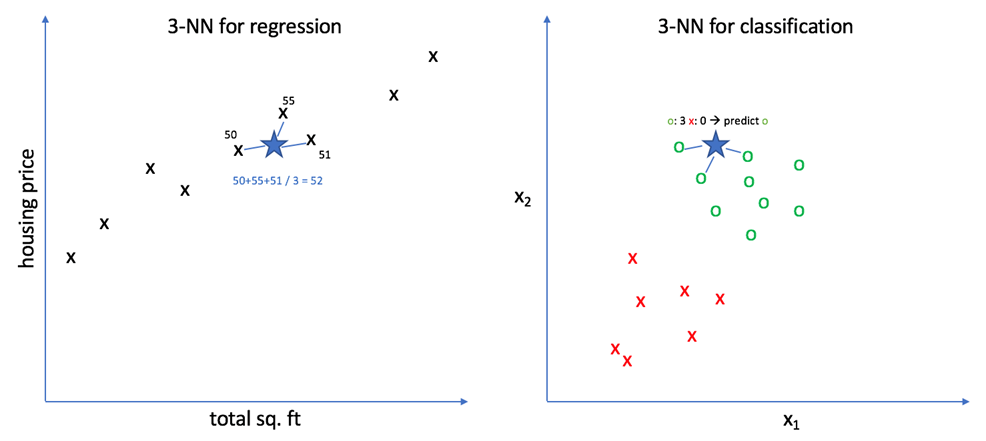

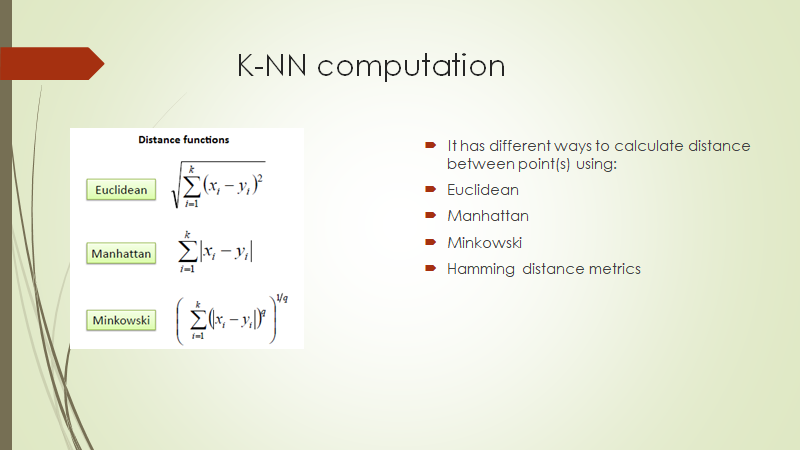

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,) 

By default number of k is 5

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

### TRaining and testing on kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(trainx, trainy)
pred=knn.predict(testx)
print(accuracy_score(pred, testy))
# l/is.append(accuracy_score(pred, testy))

0.6557377049180327


[0.5245901639344263, 0.5901639344262295, 0.639344262295082, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6557377049180327, 0.7049180327868853, 0.6721311475409836, 0.7213114754098361, 0.6721311475409836, 0.6721311475409836, 0.6721311475409836, 0.7213114754098361, 0.6885245901639344, 0.7049180327868853]


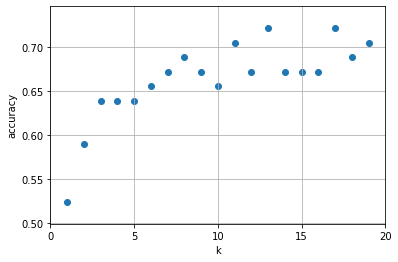

In [18]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainx, trainy)
    scores.append(knn.score(testx, testy))
print(scores)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0,5,10,15,20]);


### TRaining on Scaled Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(trainx)
X_test_scaled = scaler.transform(testx)

lr = LogisticRegression().fit(X_train_scaled, trainy)
lr_predicted = lr.predict(X_test_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(testy, lr_predicted)))

Accuracy: 0.85


C:\Users\kduisheev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
